# Video 16 SCIPY PYTHON Tutoriel - Optimize, Fourier, NdImage (16/30)

## Interpolation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

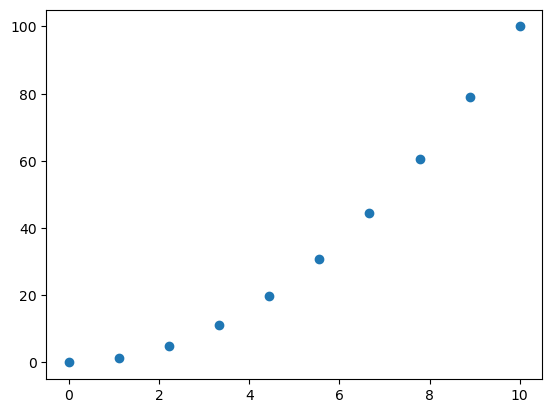

In [2]:
x = np.linspace(0,10,10)
y = x**2
plt.scatter(x,y)

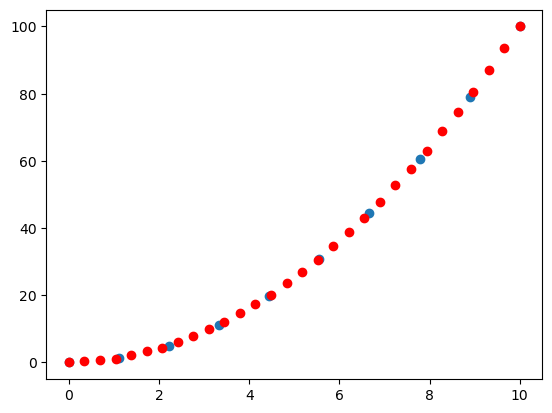

In [3]:
# on créé une fonction d'interpolation linéaire passant par x et y 
f = interp1d(x, y, kind='linear')

# création des 30 points de notre fonction d'interpolation en x
new_x = np.linspace(0,10,30)

# création des 30 points de notre fonction d'interpolation en y
result=f(new_x)

# afficher f(x)
plt.scatter(x,y)

# afficher f(new_x)
plt.scatter(new_x, result, c='r')

### Interpolation avec une fonction cosinus, on utilise cette fois l'interpolation cubique

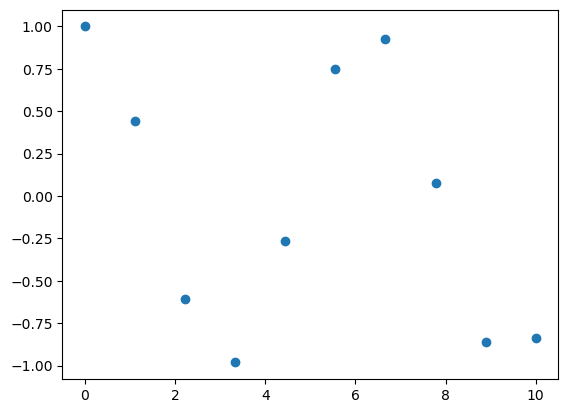

In [4]:
x = np.linspace(0,10,10)
y = np.cos(x)
plt.scatter(x,y)

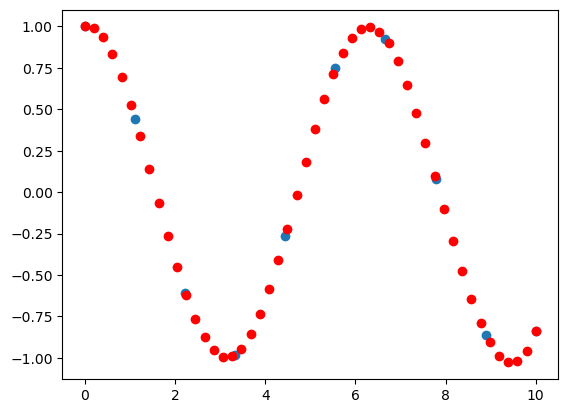

In [5]:
# on créé une fonction d'interpolation linéaire passant par x et y 
f = interp1d(x, y, kind='cubic')

# création des 30 points de notre fonction d'interpolation en x
new_x = np.linspace(0,10,50)

# création des 30 points de notre fonction d'interpolation en y
result=f(new_x)

# afficher f(x)
plt.scatter(x,y)

# afficher f(new_x)
plt.scatter(new_x, result, c='r')

# Optimize curve_fit

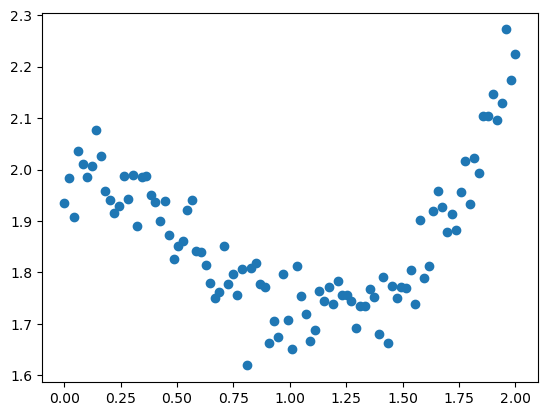

In [6]:
x = np.linspace(0,2,100)
y = 1/3*x**3 - 3/5*x**2 + 2 + np.random.randn(x.shape[0])/20
plt.scatter(x,y)

In [7]:
def f(x, a, b, c, d):
    return a * x**3 + b * x**2 + c*x + d 

In [8]:
from scipy import optimize

In [9]:
params, params_cov = optimize.curve_fit(f, x, y)

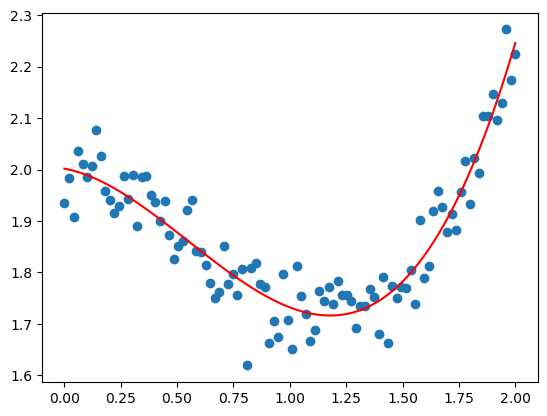

In [10]:
plt.scatter(x,y)
plt.plot(x, f(x, params[0], params[1], params[2], params[3]), c='r')

# Optimize minimize

In [11]:
def f(x):
    return x**2 + 15*np.sin(x)

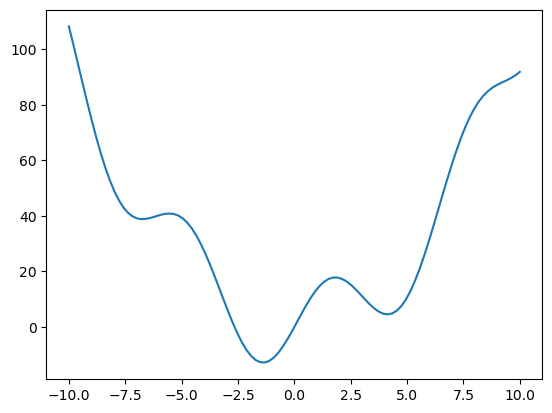

In [12]:
x = np.linspace(-10,10,100)
plt.plot(x, f(x))

In [13]:
result=optimize.minimize(f, x0=-5).x
result

array([-1.38505583])

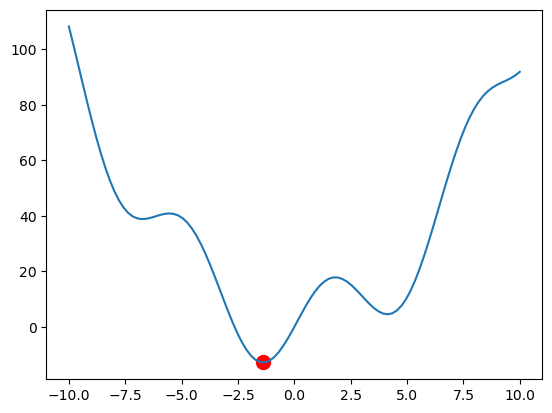

In [14]:
plt.plot(x, f(x))
plt.scatter(result, f(result), c='r', s=100, zorder=1)

## Traitement du signal

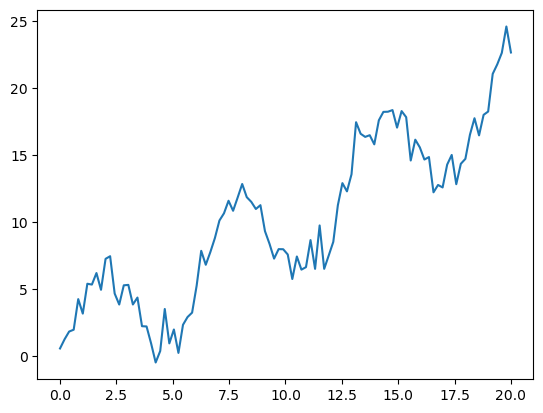

In [28]:
x = np.linspace(0,20,100)
y = x + 4*np.sin(x) + np.random.randn(x.shape[0])
plt.plot(x,y)

### Pour éliminer la tendance linéaire

In [29]:
from scipy import signal

In [31]:
new_y=signal.detrend(y)

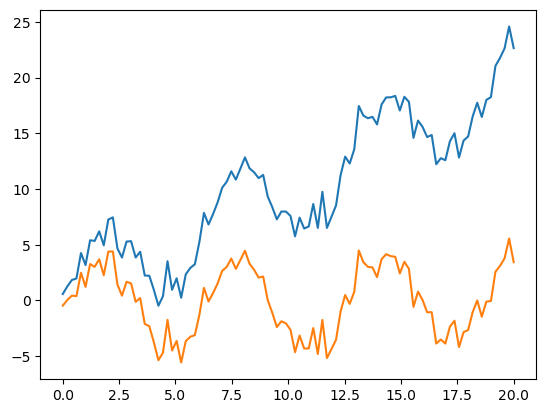

In [32]:
plt.plot(x,y)
plt.plot(x,new_y)

### La transformation de fourier

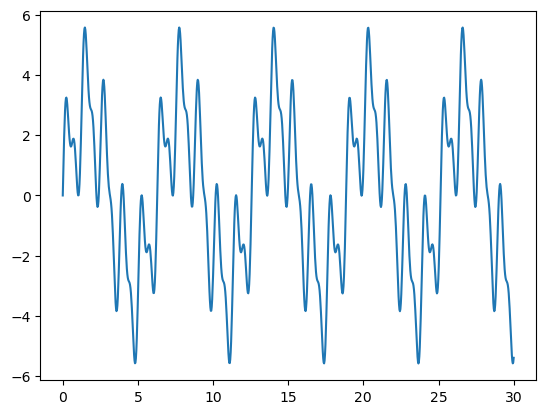

In [33]:
x = np.linspace(0,30,1000)
y = 3*np.sin(x)+2*np.sin(5*x)+np.sin(10*x)
plt.plot(x,y)

In [34]:
from scipy import fftpack

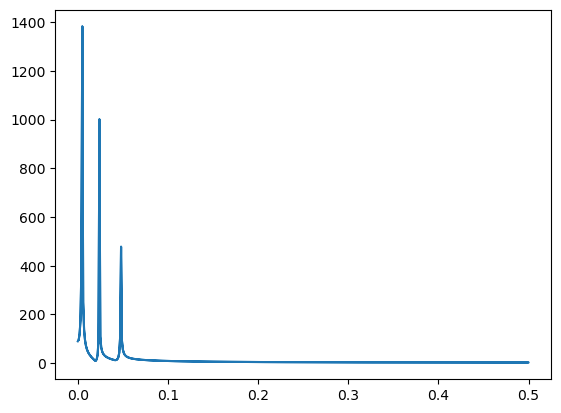

In [39]:
fourier = fftpack.fft(y)
power = abs(fourier)
frequences = fftpack.fftfreq(y.size)
plt.plot(abs(frequences), power)

## Traitement d'images